In [2]:
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [3]:
x=[3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20] # 독립변수(전기생산량)
y=[2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53] # 종속변수(전기소비량)
# 독립변수가 1개이므로 단순 회귀 분석(선형 회귀 분석) 사용
# 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다.
# 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다.
result=stats.linregress(x,y) # linregress(독립변수, 종속변수) : 선형회귀분석
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

Text(0, 0.5, '전기사용량')

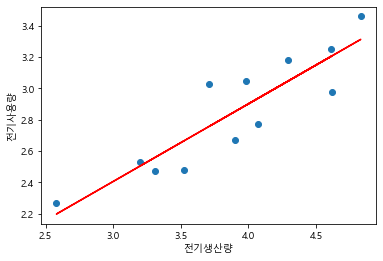

In [5]:
import numpy as np

slope,intercept,r_value,p_value,stderr=stats.linregress(x,y)
x1=np.array(x)
plt.scatter(x,y)
plt.plot(x1, slope*x1+intercept, c='red')
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")

In [6]:
# 생산량이 4일때 전기사용량 예측
4*slope+intercept 

2.901994372142104

In [8]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2, alpha): # 독립표본 t검정 : 표본으로부터 측정된 분산, 표준편차를 이용하여
    # 두 모집단의 평균의 차이를 검정하는 방법
    mean1, mean2=mean(data1), mean(data2) # 평균값
    se1, se2=sem(data1), sem(data2) # sem : 표본평균의 표준편차 
    sed=sqrt(se1**2+se2**2)
    t_stat=(mean1-mean2)/sed
    df=len(data1)+len(data2)-2 # 자유도(degrees of freedom) : (샘플 개수) - 1
    # 표본수가 n개인 표본이 있다면 표본값 중 자유롭게 변할 수 있는 값은 n-1개의 표본
    # 시험 3회 응시, 평균 80점이라고 할 때 2개의 시험에서 70점, 90점을 받았다면 나머지 1개는 80점이 되어야 함.
    # 표본수가 3이고 자유롭게 변할 수 있는 값은 2
    p=(1.0-t.cdf(abs(t_stat),df))*2.0
    return t_stat, p

x=[3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
y=[2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

alpha=0.05 # 95% 신뢰 수준
t_stat, p=independent_ttest(x,y,alpha)
print(f't = {t_stat:.3f}, p-value = {p:f}')

if p>alpha:
    print('p-value > 0.05, 귀무가설 채택, 대립가설 기각')
else:
    print('p-value < 0.05, 귀무가설 기각, 대립가설 채택')

t = 4.752, p-value = 0.000096
p-value < 0.05, 귀무가설 기각, 대립가설 채택


[-8.         -7.83838384 -7.67676768 -7.51515152 -7.35353535]
[3.39767312e-06 4.95353201e-06 7.17671574e-06 1.03327820e-05
 1.47840373e-05]


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


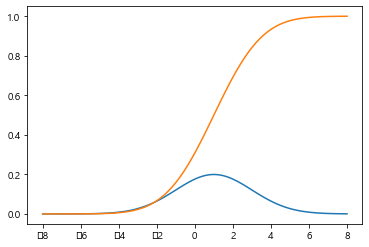

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

xx=np.linspace(-8,8,100)
rv=sp.stats.norm(loc=1, scale=2) # 정규분포 생성 loc : 기댓값, scale : 표준편차 
cdf=rv.cdf(xx) # 누적분포함수(cumulative distribution function)
pdf=rv.pdf(xx) # 확률밀도함수(누적분포함수를 미분한 함수)

print(xx[:5])
print(cdf[:5])
plt.plot(xx, pdf)
plt.plot(xx, cdf)
plt.show()

In [13]:
from sklearn.datasets import make_regression
# 가상의 회귀분석 데이터 생성 함수
X, y, w=make_regression(n_samples=50, n_features=1, bias=100, noise=10, random_state=0, coef=True)
# n_features : 독립변수의 개수, bias : y절편, noise : y의 표준편차, coef : 회귀계수(기울기) 사용 여부
print(X[:5].flatten())
print(y[:5])
print(w)

[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [14]:
import numpy as np
xx=np.linspace(-3,3,100)
y0=w*xx+100

Text(0.5, 1.0, 'regression')

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


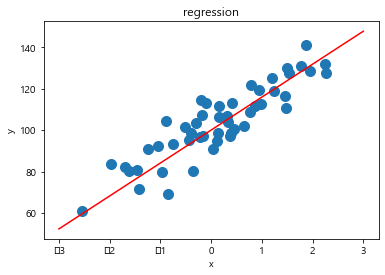

In [15]:
import matplotlib.pyplot as plt
plt.plot(xx, y0, 'r-') # red, 실선
plt.scatter(X,y,s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('regression')